In [1]:
from __future__ import print_function
from f4klib2 import *
import seaborn as sns
movs = loadMovids()
movs_length = loadLengths()

In [2]:
f,t = loadExtraTrainingSet()
print(f.shape)
print(t.shape)
print(np.histogram(t)[0])

(2815, 100)
(2815,)
[339 564 117  10 230 878 353 309   1  14]


In [3]:
forty = [112,180,272,285,330,447, 469, 474,498,500,517,527,545,550,622]
fortyone = [10, 33, 75, 82, 101, 114, 182, 183, 275, 279, 282, 291, 306, 325, 338, 380, 420, 424]

In [4]:
movs = loadMovids()
movs_length = loadLengths()
idl = np.hstack((np.arange(30598,30633),np.arange(30634,30638)))

forty = [112,180,272,285,330,447, 469, 474,498,500,517,527,545,550,622]
fortyone = [10, 33, 75, 82, 101, 114, 182, 183, 275, 279, 282, 291, 306, 325, 338, 380, 420, 424]

idl = np.hstack((idl,np.array(forty),np.array(fortyone)))

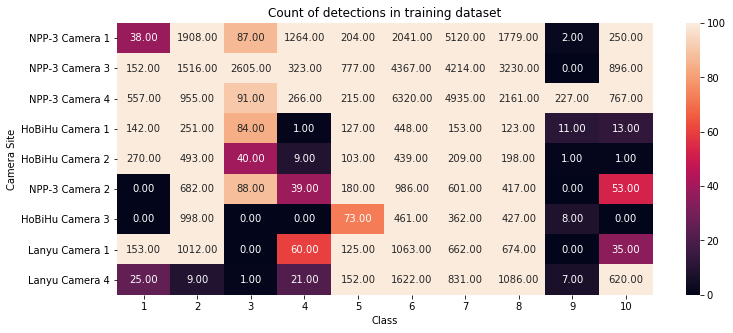

In [5]:
#print(np.unique(movs[idl][:,1]))

ids = movs[idl]
idss = ids[:,1]
sites = np.unique(idss)

dets = [None] * 9

for j, s in enumerate(sites):
    subset = ids[idss==s]
    idees = idl[idss==s]
    
    totcount = np.zeros(10)
    
    for v in idees:
        try:   gts = loadGT(movs[v][0], movs_length[v], partial=True)
        except:
            try:gts = loadGT(movs[v][0], movs_length[v], partial=False)
            except:gts = np.array(loadNewGT(movs[v][0], movs_length[v]))
        
        gts = gts[gts!=None]
                
        
        counts = np.histogram(gts,np.arange(0,12))[0]
        totcount += counts[1:]
        
    dets[j] = totcount
    
dets = np.array(dets)

cameras = ["NPP-3 Camera 1", "NPP-3 Camera 3",  "NPP-3 Camera 4",
           "HoBiHu Camera 1","HoBiHu Camera 2", "NPP-3 Camera 2",
           "HoBiHu Camera 3","Lanyu Camera 1",  "Lanyu Camera 2"]
plt.figure(figsize=(12,5))
sns.heatmap(dets,
            xticklabels=np.arange(1,11), 
            yticklabels=cameras, 
            vmin=0, vmax=100, 
            fmt='.2f', annot=True)
plt.xlabel("Class")
plt.ylabel("Camera Site")
plt.title("Count of detections in training dataset")
plt.show()

(63916, 100)
(63916,)


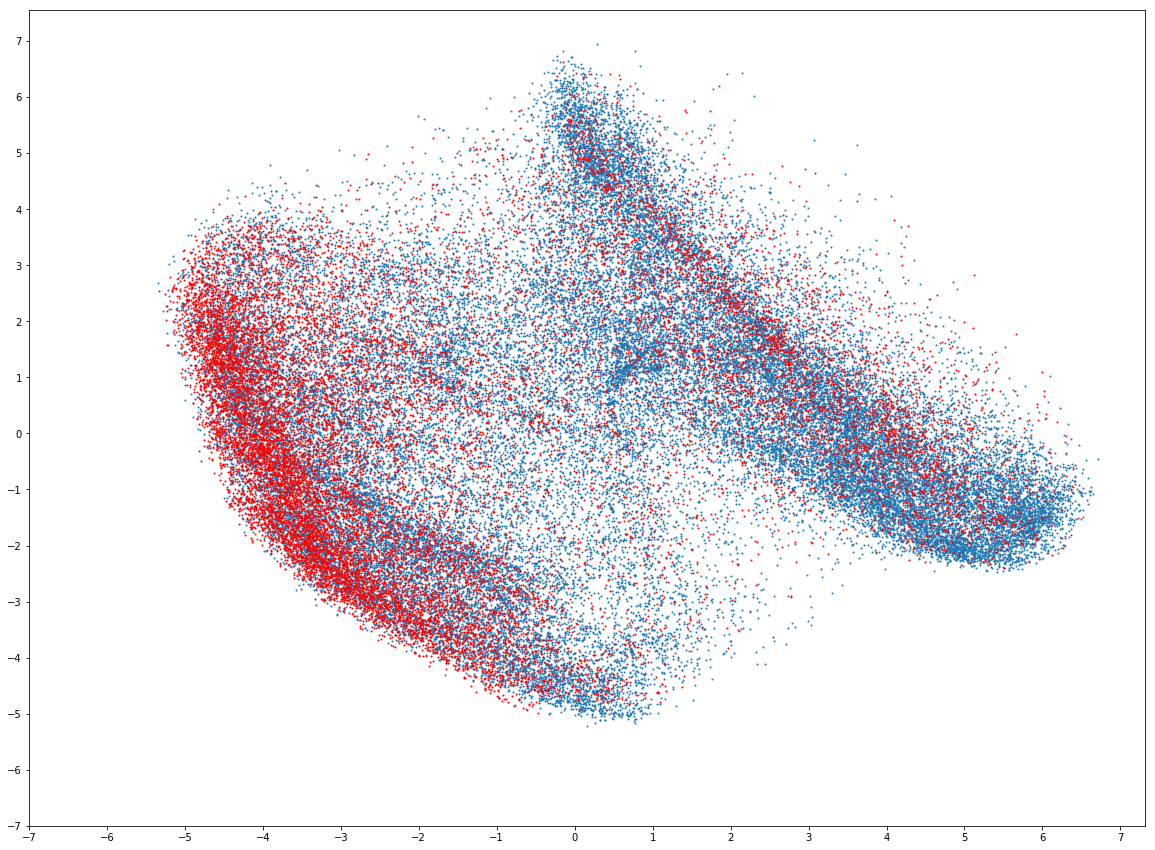

In [6]:
features,targets = loadTrainDataSet(includeNew=True)
print(features.shape)
print(targets.shape)
mask = targets == 6
notfmask = np.bitwise_not(mask)

plt.figure(figsize=(20,15))
plt.scatter(features[notfmask][:,0],features[notfmask][:,1],s=1)
plt.scatter(features[mask][:,0],features[mask][:,1],s=1,color="red")
plt.xticks(np.arange(-7,8,1))
plt.yticks(np.arange(-7,8,1))
plt.show()

(12693,)
(18080,)
(16494,)
(1353,)
(1763,)
(3046,)
(2329,)
(3784,)
(4374,)


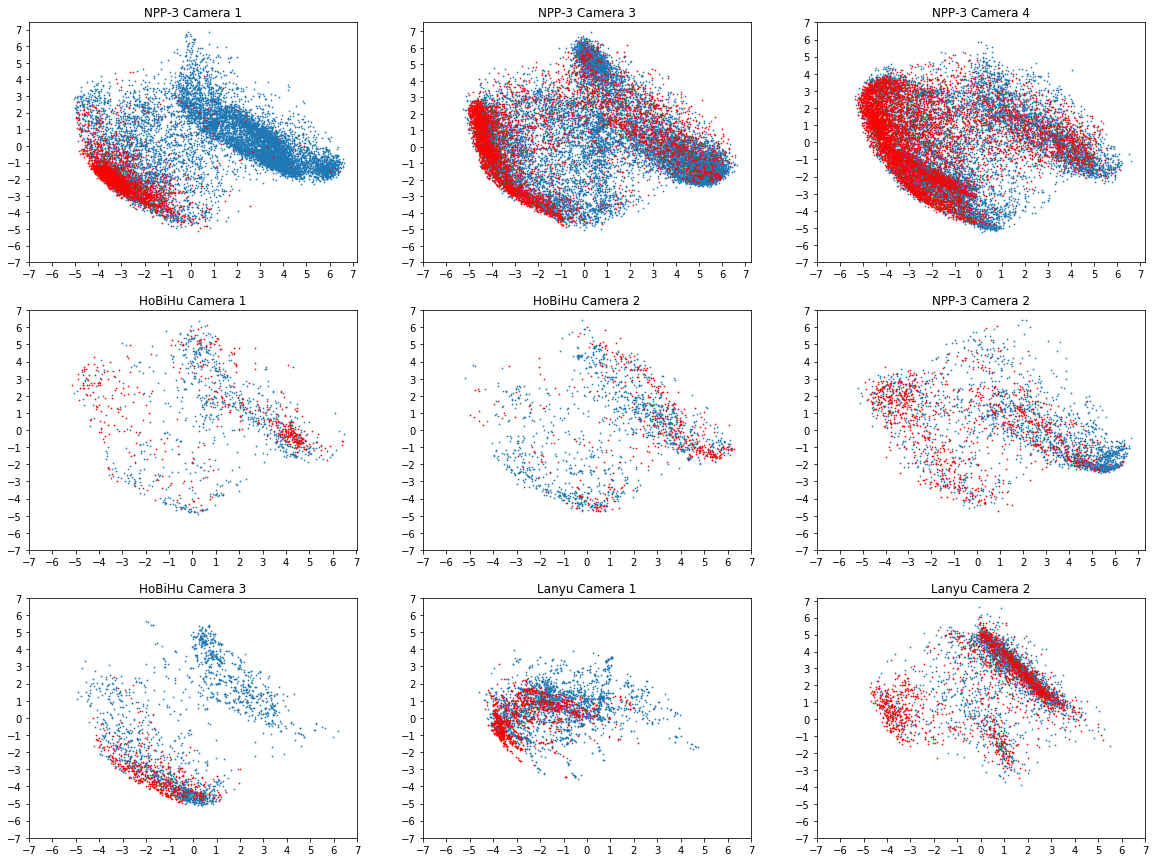

In [21]:
plt.subplots(3,3,figsize=(20,15))
sites = ["37","38","39","40","41","42","43","44","46"]
cameras = ["NPP-3 Camera 1", "NPP-3 Camera 3",  "NPP-3 Camera 4",
           "HoBiHu Camera 1","HoBiHu Camera 2", "NPP-3 Camera 2",
           "HoBiHu Camera 3","Lanyu Camera 1",  "Lanyu Camera 2"]

for i in np.arange(9):
    plt.subplot(3,3,i+1)

    features,targets = loadTrainDataSet(includeNew=True, filta=sites[i])
    print(targets.shape)
    mask = targets == 6
    #mask = np.bitwise_or(targets==6,np.bitwise_or(targets==7,targets==8))
    notfmask = np.bitwise_not(mask)

    #plt.scatter(features[mask][:,0],features[mask][:,1],s=0.5,color="red")
    plt.scatter(features[notfmask][:,0],features[notfmask][:,1],s=0.5)
    plt.scatter(features[mask][:,0],features[mask][:,1],s=0.5,color="red")
    plt.xticks(np.arange(-7,8,1))
    plt.yticks(np.arange(-7,8,1))
    plt.title(cameras[i])
plt.show()

In [ ]:
#temppicka = np.arange(30598,30695)
#picker = temppicka[3]
#picker = 30598
picker = fortyone[16]
movid = movs[picker]
info, clip, hasContour, contour, fish_id, frames = loadVideo(movid,
                                                    print_info=True,
                                                    print_time=True)

In [ ]:
h = 0
w = 5
d = 2
g = 1
t = h + d * w 
#gts = loadGT(movid[0], frames, partial=True)
gts = loadNewGT(movid[0],frames)
plotStuff(info, clip, hasContour, contour, movid, 
          limit_lower=h, limit_upper=t, width=w, gap=g, 
          classify=True,gt=gts)